<a href="https://colab.research.google.com/github/ramisa7/Team_EEG/blob/main/Milestone1_Data_Science_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Initial Data Analysis



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In the initial data analysis phase, we start by loading the dataset and examining its structure, summary statistics, and distribution of values. This helps us gain insights into the data and understand its characteristics before proceeding with further analysis or modeling. We also visualize the distribution of certain features in the dataset using histograms, bar plots, or box plots. This helps us understand the distribution of values and identify any patterns or outliers in the data.

In [2]:

train_path = r"train.csv"
train_data = pd.read_csv(train_path)
train_data

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [3]:
print('Train shape:', train_data.shape )

Train shape: (106800, 15)


In [8]:
targets = train_data.columns[-6:]
print('Targets', list(targets))

Targets ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


In [25]:
# Summary statistics for numerical columns in train.csv
print("\nSummary Statistics - Training Data:")
print(train_data.describe())


Summary Statistics - Training Data:
             eeg_id     eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
count  1.068000e+05  106800.000000             106800.000000    1.068000e+05   
mean   2.104387e+09      26.286189                118.817228    1.067262e+09   
std    1.233371e+09      69.757658                314.557803    6.291475e+08   
min    5.686570e+05       0.000000                  0.000000    3.537330e+05   
25%    1.026896e+09       1.000000                  6.000000    5.238626e+08   
50%    2.071326e+09       5.000000                 26.000000    1.057904e+09   
75%    3.172787e+09      16.000000                 82.000000    1.623195e+09   
max    4.294958e+09     742.000000               3372.000000    2.147388e+09   

       spectrogram_sub_id  spectrogram_label_offset_seconds      label_id  \
count       106800.000000                     106800.000000  1.068000e+05   
mean            43.733596                        520.431404  2.141415e+09   
std        

In [4]:
#count missing values
missing_values = train_data.isnull().sum()
missing_values


eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64

In [5]:
duplicate_rows = train_data[train_data.duplicated()].shape

There is no missing/duplicate data.  

In [9]:
# Distribution of classes in train.csv
class_distribution = train_data[targets].sum()

# convert vote to probability
train_data[targets] /= train_data[targets].sum(axis=1).values[:, None]
train_data

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0


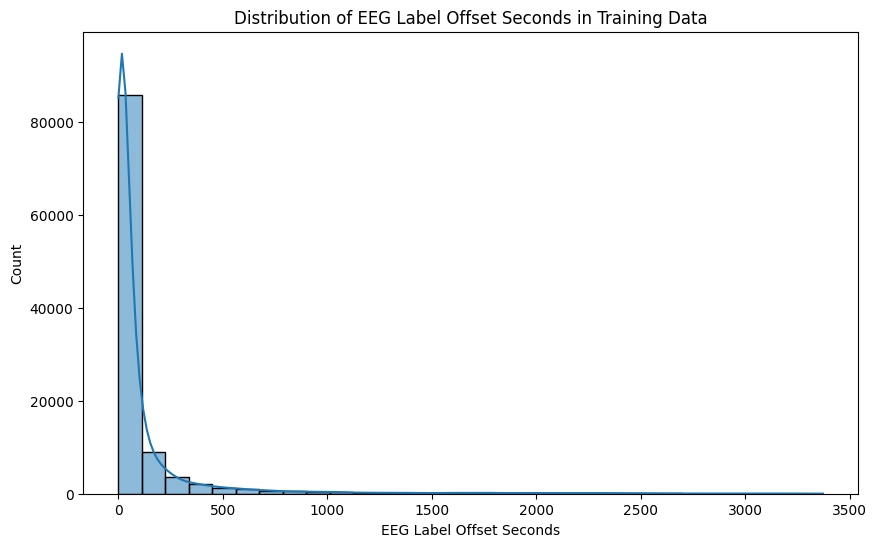

In [31]:
# Visualize distribution of eeg_label_offset_seconds in train.csv
plt.figure(figsize=(10, 6))
sns.histplot(train_data['eeg_label_offset_seconds'], bins=30, kde=True)
plt.title('Distribution of EEG Label Offset Seconds in Training Data')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Count')
plt.show()

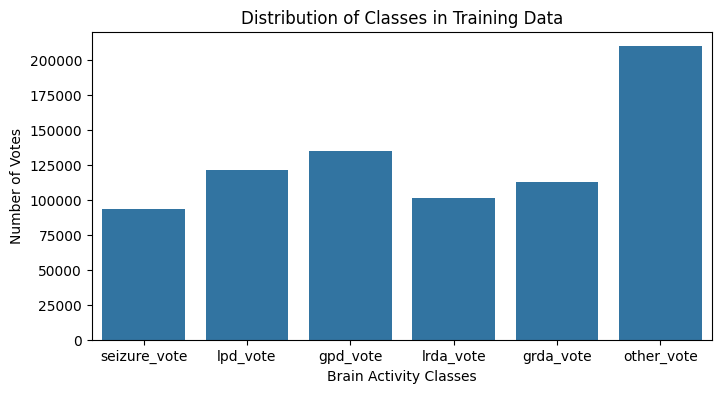

In [32]:
# Plot the distribution of classes
plt.figure(figsize=(8, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Brain Activity Classes')
plt.ylabel('Number of Votes')
plt.show()

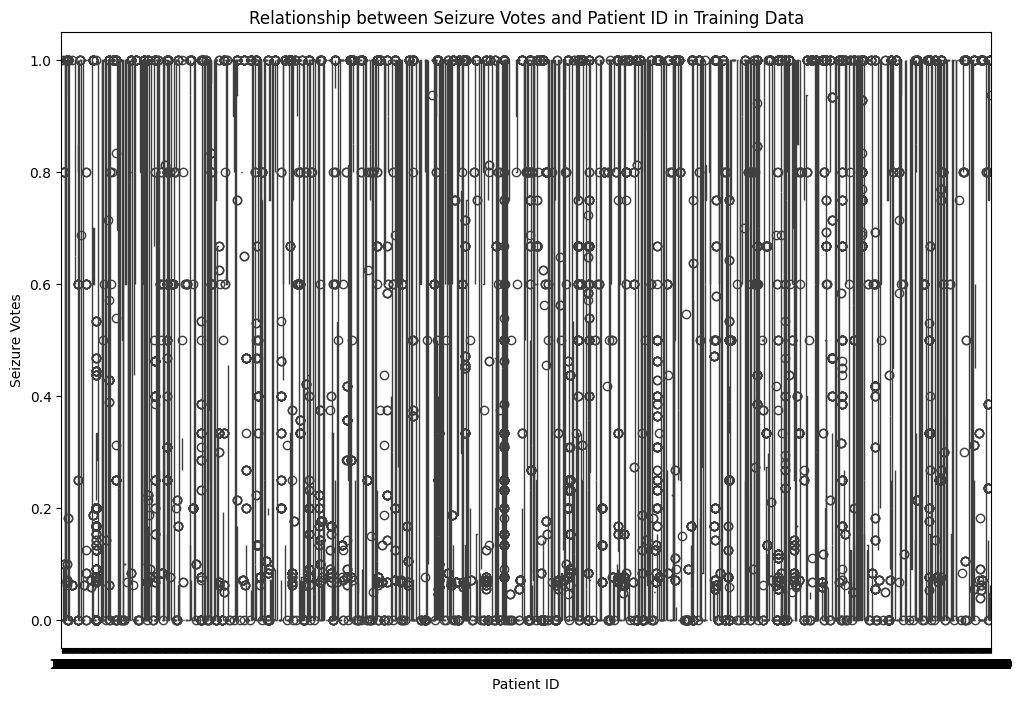

In [33]:
# Relationship between classes and patient_id in train.csv
plt.figure(figsize=(12, 8))
sns.boxplot(x='patient_id', y='seizure_vote', data=train_data)
plt.title('Relationship between Seizure Votes and Patient ID in Training Data')
plt.xlabel('Patient ID')
plt.ylabel('Seizure Votes')
plt.show()

In [34]:
!pip install pyarrow



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ramis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


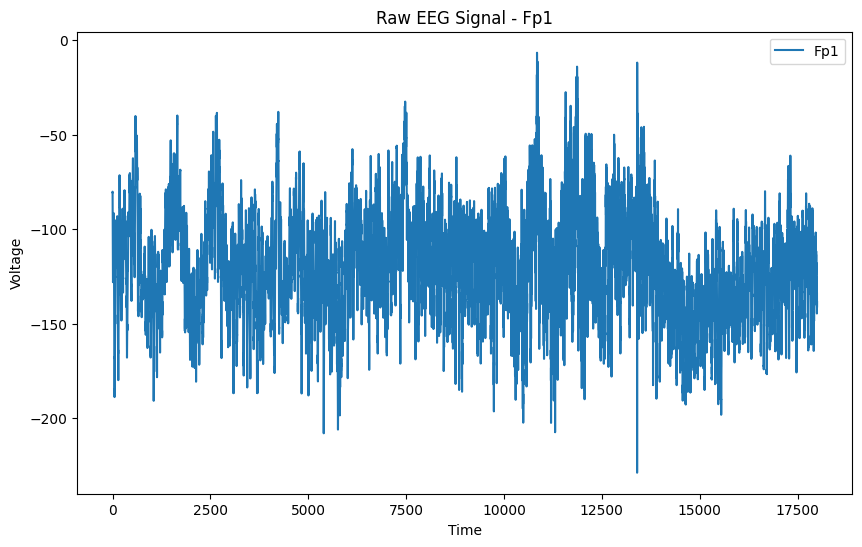

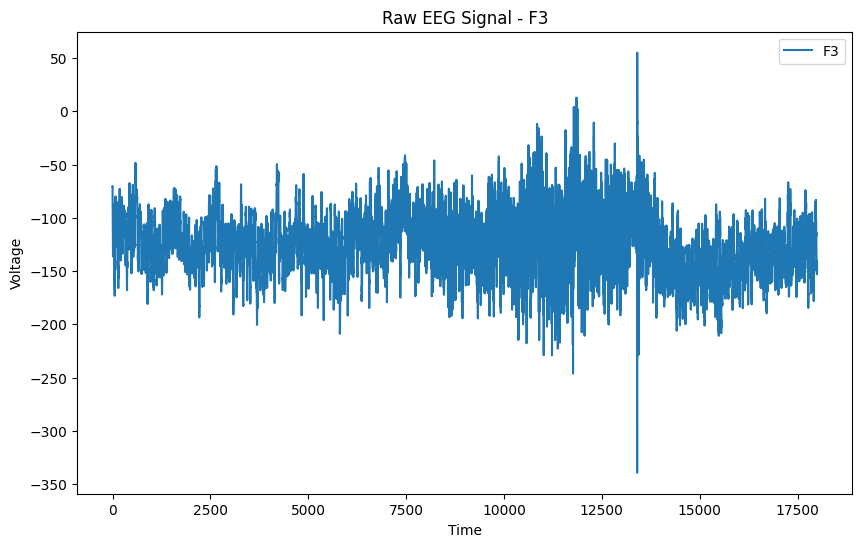

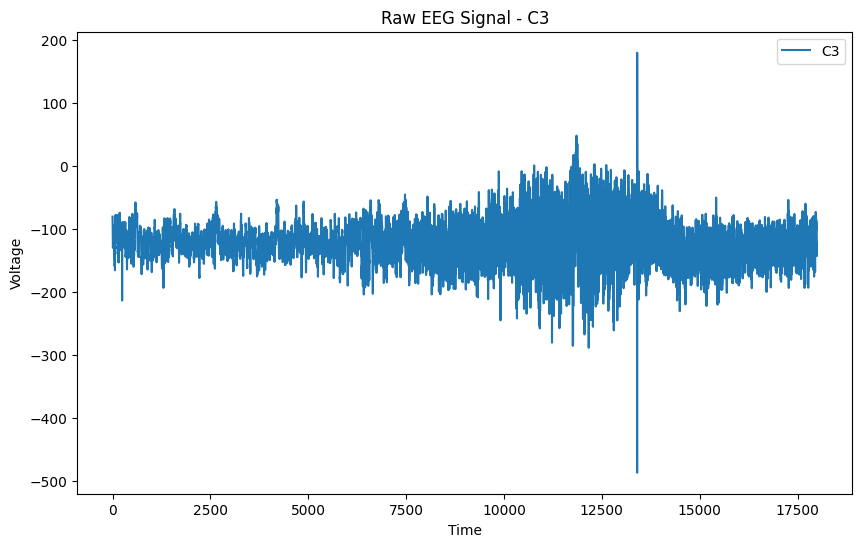

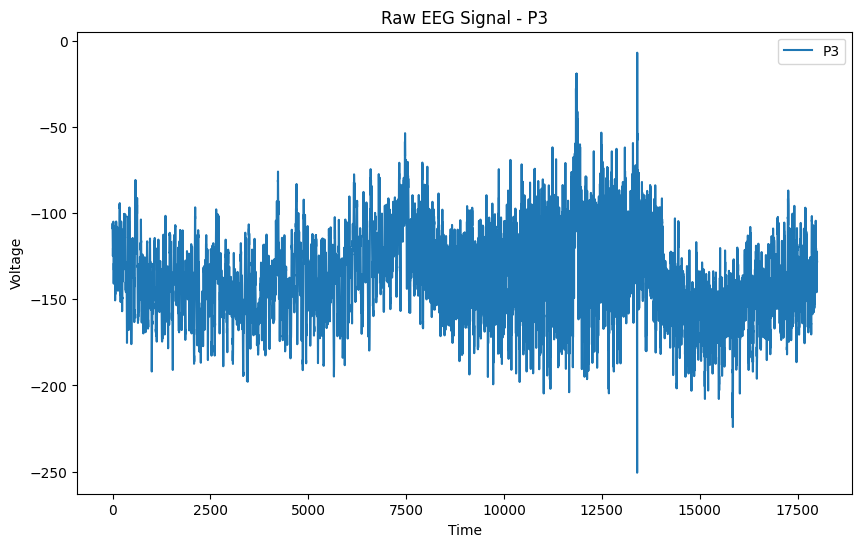

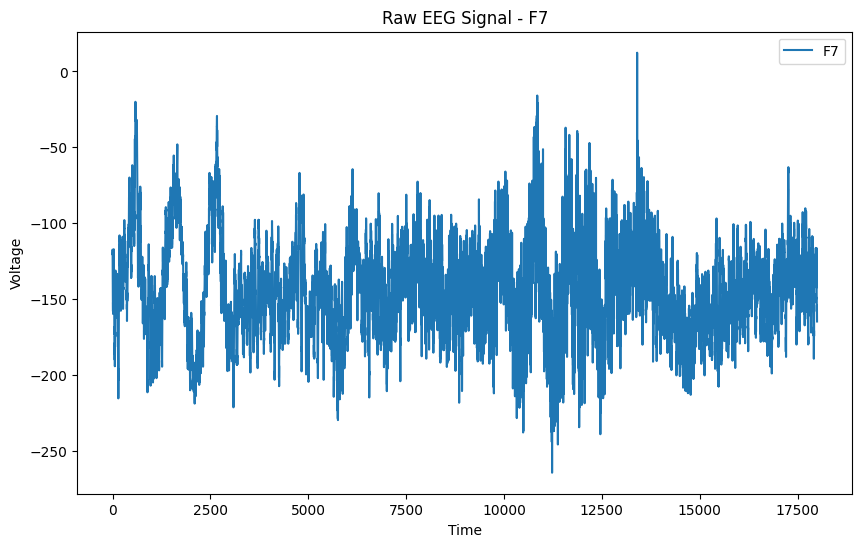

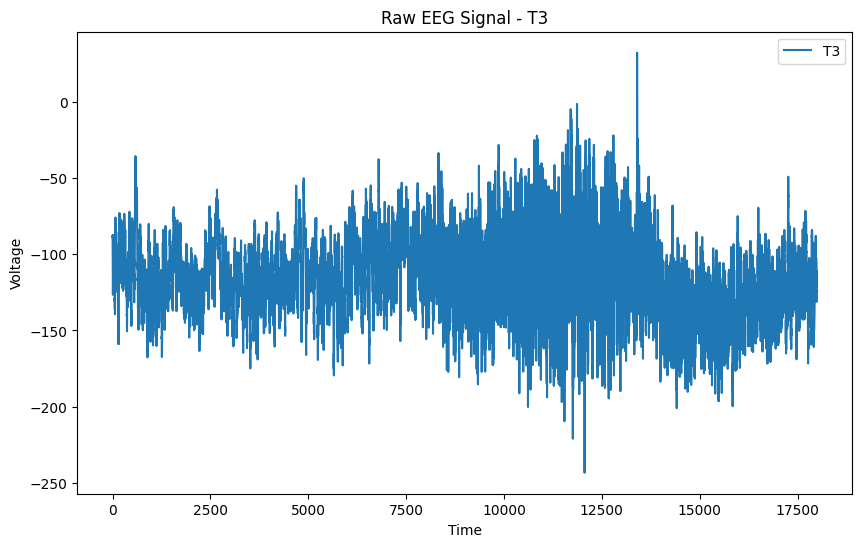

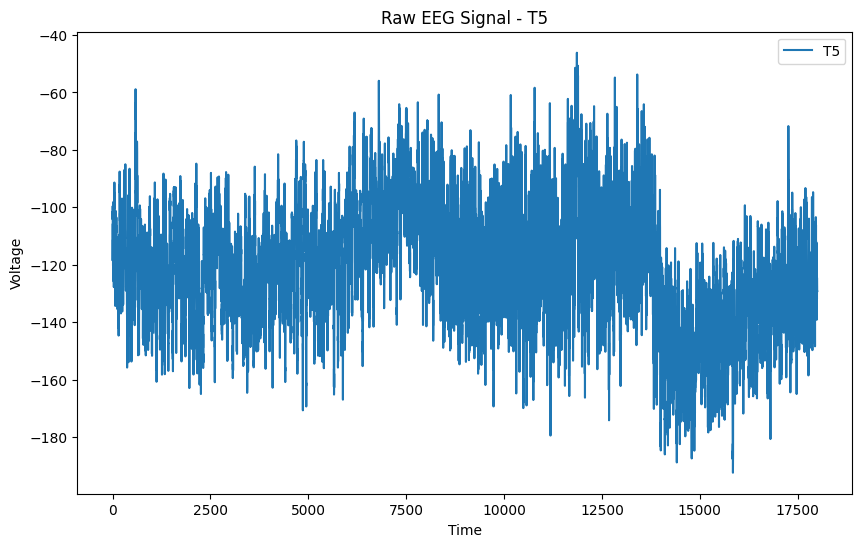

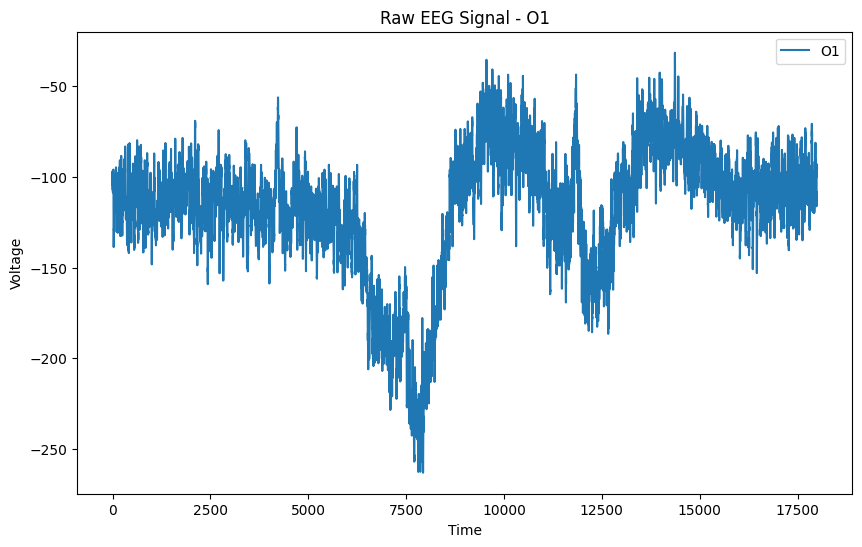

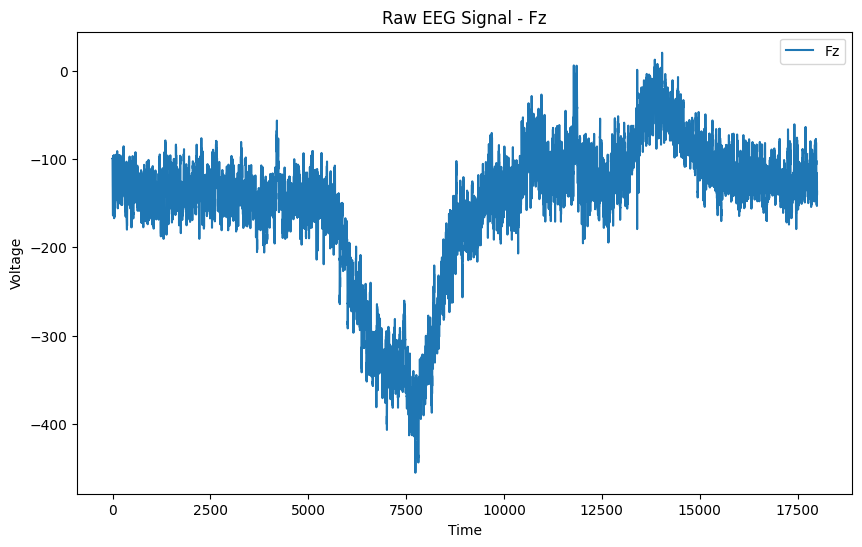

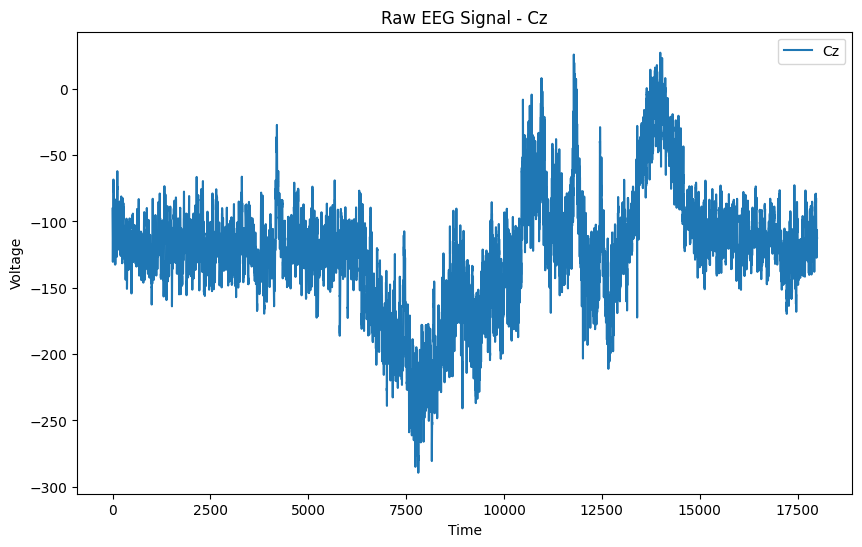

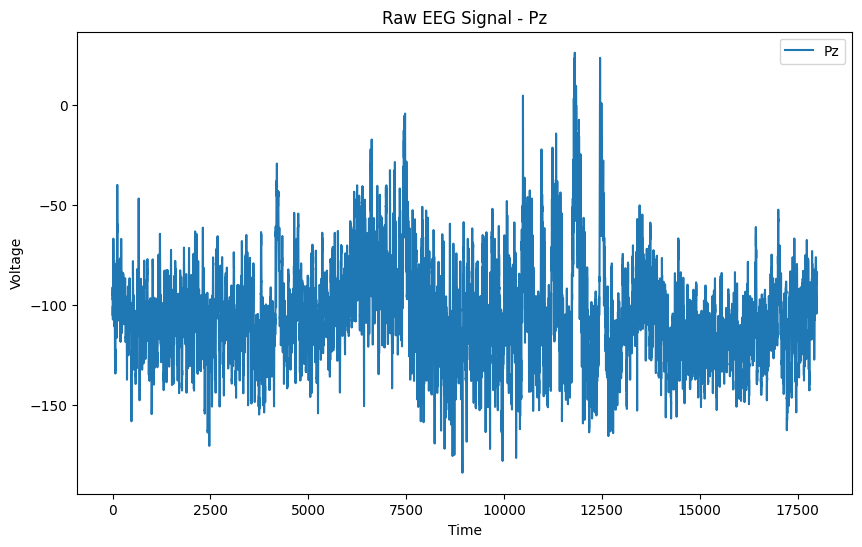

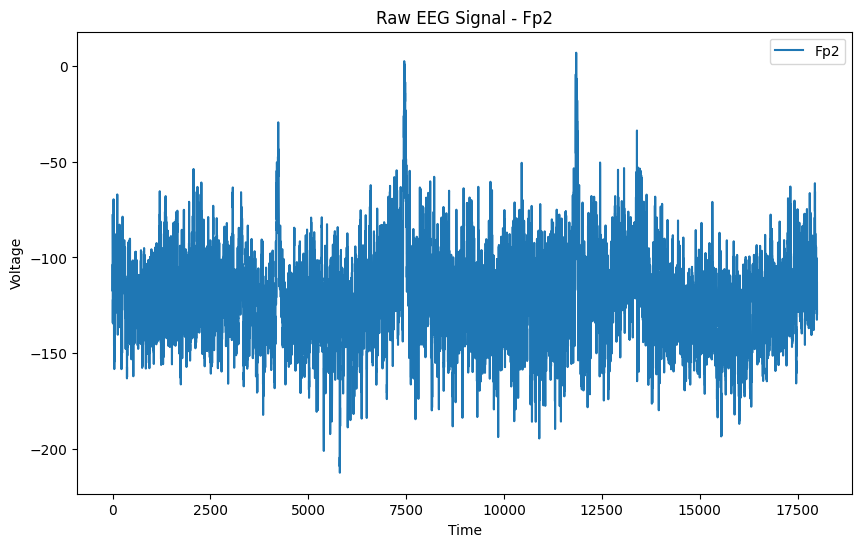

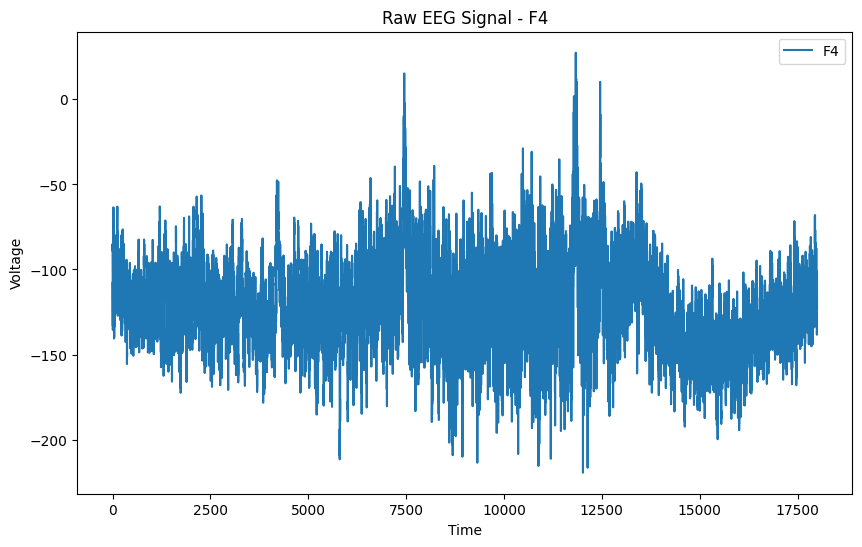

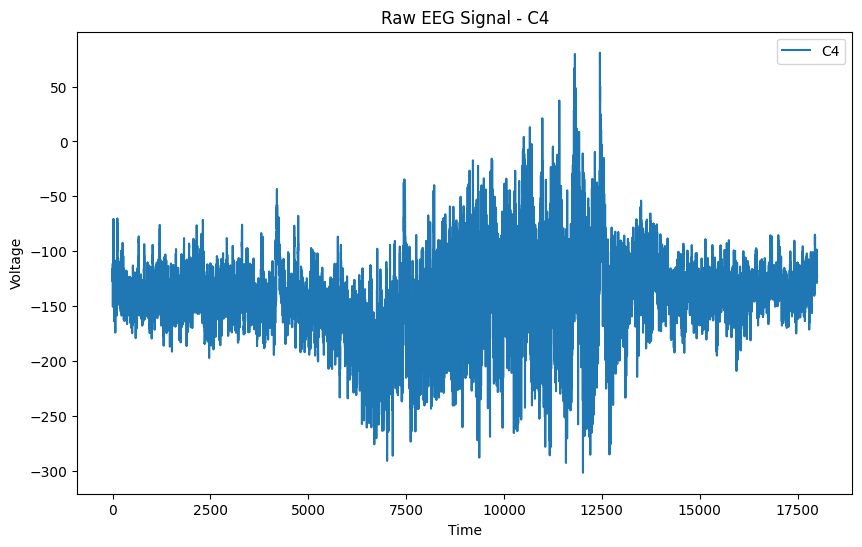

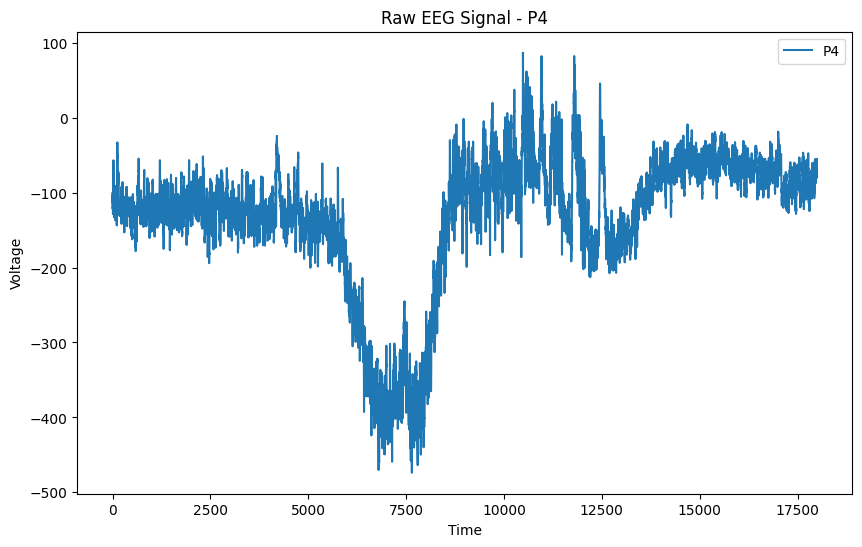

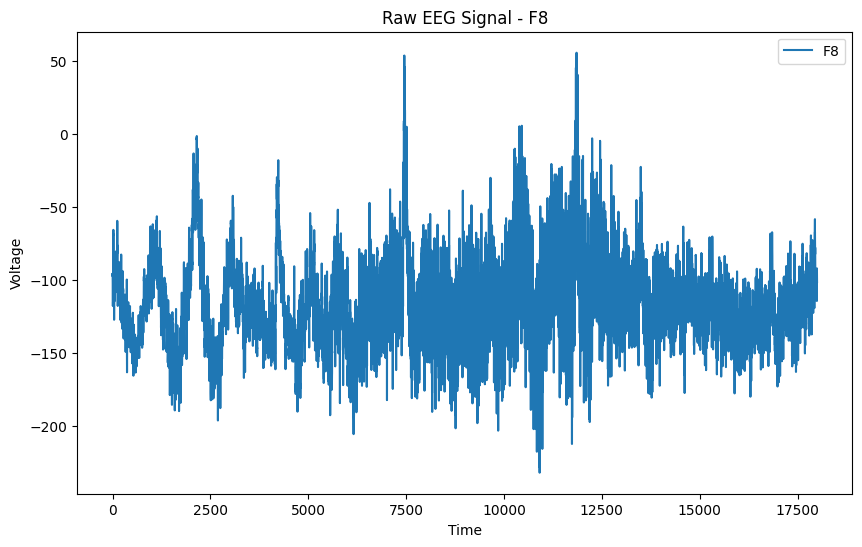

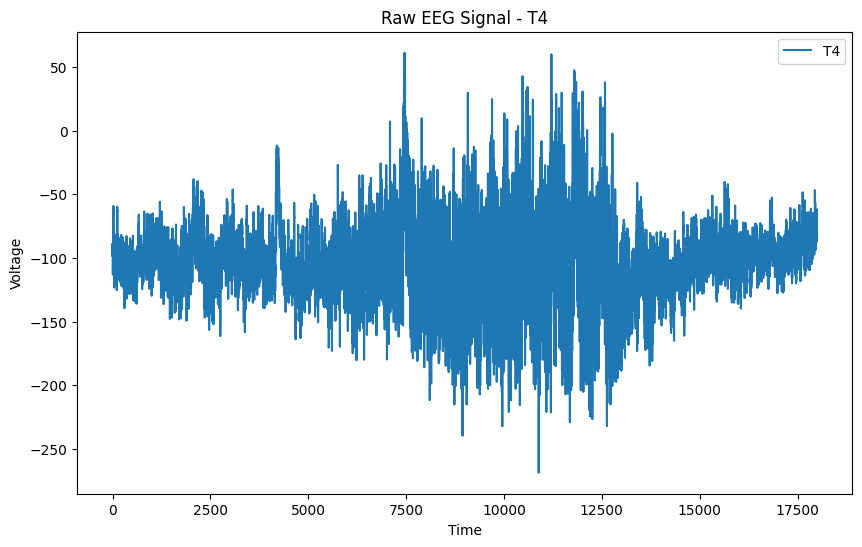

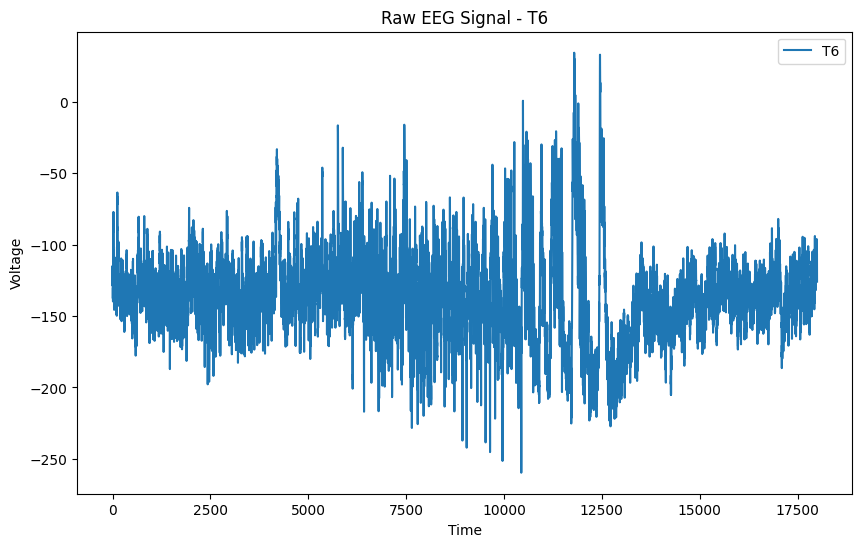

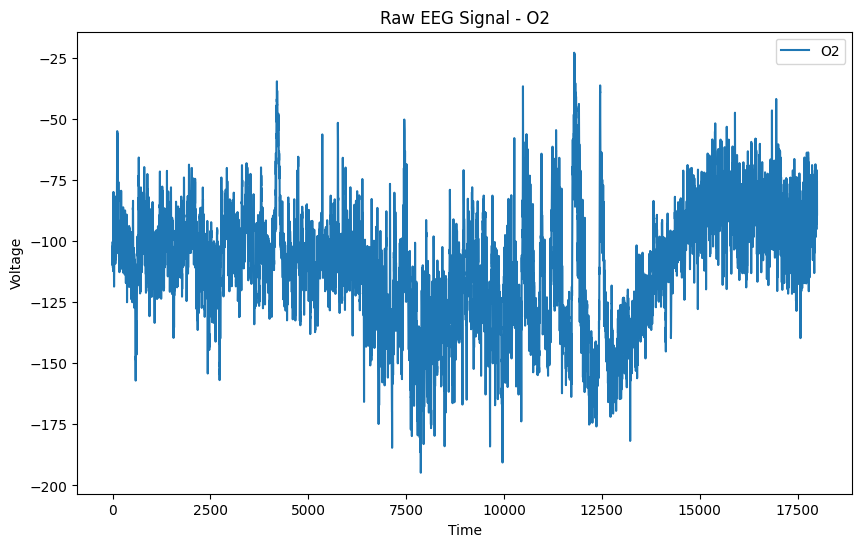

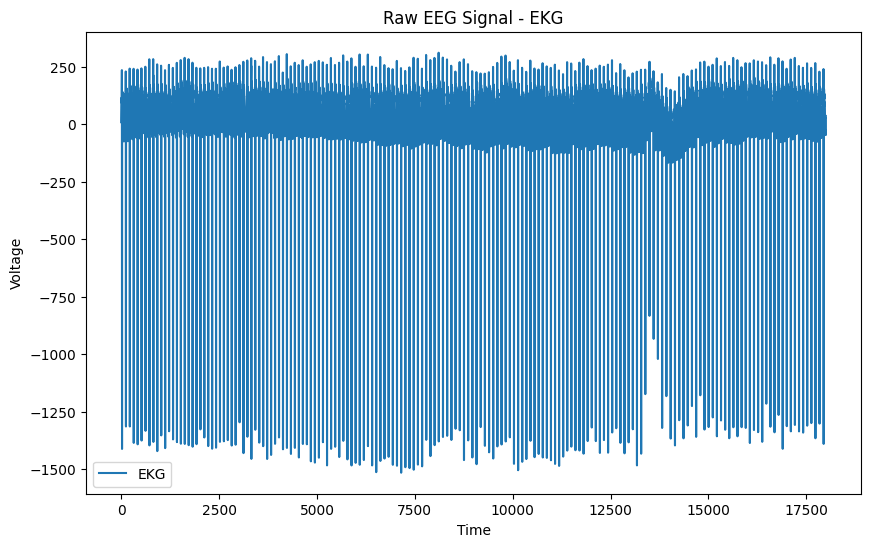

Raw data visualization successful.


In [10]:

import os  # Import the os module for file path manipulation

# raw data visualization:
eeg_id = 1628180742
subsample_id = 0

# Construct the file path
base_dir = "train_eegs"  # Specify the base directory
eeg_filename = os.path.join(base_dir, f"{eeg_id}.parquet")  

# try:
raw_eeg_data = pd.read_parquet(eeg_filename)
# Plot each electrode channel
for column in raw_eeg_data.columns:
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a new figure and axis for each plot
    ax.plot(raw_eeg_data.index, raw_eeg_data[column], label=column)
    ax.set_title("Raw EEG Signal - " + column)
    ax.set_xlabel("Time")
    ax.set_ylabel("Voltage")
    ax.legend()
    plt.show()


print("Raw data visualization successful.")
# except FileNotFoundError:
#     print(f"File {eeg_filename} not found.")
# except Exception as e:
#     print(f"An error occurred: {e}")


In [11]:
# extractdata from parquet file 

import pyarrow.parquet as pq
import os

# Load the parquet file
eeg_id = 1628180742
base_dir = "train_eegs"
eeg_filename = os.path.join(base_dir, f"{eeg_id}.parquet")
eeg_data = pq.read_table(eeg_filename).to_pandas()

# Display the first  row of the data
print(eeg_data.head(1))

#check the shape 
print(eeg_data.shape)


         Fp1         F3         C3      P3          F7         T3      T5  \
0 -80.519997 -70.540001 -80.110001 -108.75 -120.330002 -88.620003 -101.75   

           O1         Fz         Cz         Pz        Fp2         F4  \
0 -104.489998 -99.129997 -90.389999 -97.040001 -77.989998 -88.830002   

           C4          P4         F8         T4          T6          O2   EKG  
0 -112.120003 -108.110001 -95.949997 -98.360001 -121.730003 -106.449997  7.92  
(18000, 20)


In [12]:
eeg_data.describe()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,-119.994469,-123.802223,-120.543739,-136.882324,-143.382889,-116.084724,-121.428864,-117.246330,-150.101456,-121.912170,-105.150368,-120.984222,-121.704346,-140.901459,-131.869690,-115.931519,-104.970650,-135.828827,-109.691414,17.001839
std,27.175001,27.689135,29.546789,23.101101,30.982689,24.944113,19.780449,35.218807,76.122078,43.007950,23.996809,22.000219,25.215227,34.550583,91.684547,28.903143,29.998327,30.826473,23.196136,220.074539
min,-228.910004,-339.399994,-486.630005,-250.679993,-264.570007,-243.399994,-192.449997,-263.079987,-455.470001,-289.450012,-183.970001,-212.300003,-219.460007,-301.829987,-473.809998,-232.289993,-268.660004,-259.700012,-194.800003,-1515.810059
25%,-138.872498,-142.472500,-138.142498,-152.729996,-164.720001,-132.589996,-134.699997,-129.514996,-161.902496,-140.960007,-120.910004,-135.432495,-138.330002,-159.339996,-149.537498,-134.559998,-121.230003,-153.642498,-125.449997,-3.822500
50%,-120.510002,-124.485001,-121.279999,-137.644997,-144.404999,-116.769997,-121.339996,-111.190002,-133.550003,-119.739998,-107.620003,-121.809998,-122.564999,-139.665001,-112.239998,-117.820000,-104.449997,-136.169998,-107.370003,52.619999
75%,-102.150002,-106.127499,-103.687502,-121.849998,-124.304998,-100.010002,-108.307499,-95.339996,-108.529999,-101.605000,-92.292501,-107.739998,-106.059998,-122.337498,-73.777498,-100.317499,-88.937502,-119.930000,-93.455000,109.477501
max,-6.680000,54.980000,180.119995,-6.930000,12.310000,32.270000,-46.180000,-31.590000,20.639999,27.170000,26.360001,6.770000,27.410000,80.830002,86.750000,55.810001,61.070000,34.250000,-22.809999,310.029999


# 2. Literature Review

-

Applying Classification Algorithms to Identify Brain Activity Patterns

https://link.springer.com/chapter/10.1007/978-3-030-78811-7_42#Sec2


This study investigates the use of classification algorithms on EEG data to detect eye state patterns. Key areas explored include feature selection, preprocessing techniques, algorithm comparison, and real-time application. Using Weka, 20 algorithms were tested on "EEG Motor Movement/Imagery" data, with IBk, RandomForest, and RandomTree performing best. Further tests confirmed IBk's consistency. Simple preprocessing methods yielded accuracies of 73%–93%. This highlights machine learning's potential in diverse EEG applications beyond medical diagnostics.



- EEG-Inception: An Accurate and Robust End-toEnd Neural Network for EEG-based Motor Imagery
Classification

https://arxiv.org/abs/2101.10932

This paper presents a novel convolutional neural network (CNN) architecture called EEG-Inception for precise and robust classification of EEG-based motor imagery (MI) in brain-computer interface (BCI) research. EEG-Inception, based on the Inception-Time network, achieves high accuracy without complex signal preprocessing. A unique data augmentation method enhances accuracy by at least 3% and reduces overfitting with limited datasets. The model surpasses state-of-the-art methods, achieving 88.4% and 88.6% accuracy on BCI Competition IV 2a and 2b datasets, respectively, with rapid processing suitable for real-time applications. Notably, it demonstrates low classification standard deviation, indicating robustness across subjects. Results suggest EEG-Inception's potential as a subject-independent classifier for EEG-based MI tasks.

- Classification for EEG Signals Using Machine Learning Algorithm

https://link.springer.com/chapter/10.1007/978-3-031-48774-3_24

This paper explores the classification of EEG signals using machine learning algorithms, specifically Random Forest (RF) and Support Vector Machine (SVM). The study evaluates their performance on a publicly available dataset from the Bonn University EEG database. Feature extraction is conducted through decomposed sub bands of shearlet transform, generating parameters like the Grey Level Co-occurrence Matrix (GLCM). Feature selection is employed to enhance classification accuracy. Without feature selection, SVM and RF classifiers achieved accuracies of 90.3% and 91.2%, respectively. However, with feature selection, accuracy improved to 92.7% for SVM and 93.5% for RF. This underscores the effectiveness of feature selection in improving EEG signal classification accuracy.



# 3. Baseline Model - Random Forest: 

We start by loading EEG data from a CSV file, followed by extracting relevant features and target labels. Target labels are identified based on the highest vote among seizure, LPD, GPD, LRDA, GRDA, and other categories. EEG data is then loaded from parquet files for each unique EEG ID, segmented, and averaged to create a feature vector. The data is cleaned by removing rows with missing values.

To ensure a balanced training dataset, the classes are equalized by undersampling to have an equal number of samples in each class. The balanced dataset is then split into training and testing sets. A Random Forest classifier is trained on the training data and its accuracy is evaluated on the test set.

Cross-validation is performed to check for overfitting and to ensure the model's robustness. The results include a detailed classification report with precision, recall, and F1-score for each class, along with ROC curves to visualize the model's performance in distinguishing between categories.


In [13]:
import pandas as pd
import os
import pyarrow.parquet as pq
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load the data
train_data = pd.read_csv('train.csv')

# Step 2: Prepare the data
# Extract target labels
y = train_data[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].idxmax(axis=1)

# Step 3: Load EEG data from Parquet files
eeg_data = []
labels = []

for eeg_id, group_df in train_data.groupby('eeg_id'):
    parquet_file_path = os.path.join('train_eegs', f'{eeg_id}.parquet')
    eeg_df = pq.read_table(parquet_file_path).to_pandas()
    for _, row in group_df.iterrows():
        eeg_sub_id = row['eeg_sub_id']
        eeg_sample = eeg_df.iloc[eeg_sub_id*200 : (eeg_sub_id+1)*200]  # assuming 200 samples per second
        eeg_data.append(eeg_sample.mean(axis=0))  # mean of the segment as feature
        labels.append(row[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].idxmax())

# Create DataFrame from the EEG data
X = pd.DataFrame(eeg_data)

# Check for missing values
print(X.isnull().sum())
# Drop rows with missing values
X.dropna(inplace=True)

# Create the label DataFrame
y = pd.Series(labels)
y = y[X.index] 

# Step 4: Balance the dataset
class_counts = y.value_counts()
min_samples = class_counts.min()

# Sample an equal number of samples for each class
balanced_indices = []
for target_class in class_counts.index:
    class_indices = y[y == target_class].index[:min_samples]
    balanced_indices.extend(class_indices)

# Filter the data to include only the balanced samples
X_balanced = X.loc[balanced_indices]
y_balanced = y.loc[balanced_indices]

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Step 6: Model Training
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Cross-Validation
cv_scores = cross_val_score(rf_classifier, X_balanced, y_balanced, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

# Classification report
print(classification_report(y_test, y_pred))



Fp1    243
F3     243
C3     243
P3     243
F7     243
T3     243
T5     243
O1     243
Fz     243
Cz     243
Pz     243
Fp2    243
F4     243
C4     243
P4     243
F8     243
T4     243
T6     243
O2     243
EKG    243
dtype: int64
Accuracy: 0.6127
Cross-Validation Scores: [0.42453414 0.44654619 0.40772436 0.46807792 0.42241865]
Mean CV Score: 0.43386025131927114
              precision    recall  f1-score   support

    gpd_vote       0.77      0.72      0.74      2947
   grda_vote       0.59      0.64      0.61      2904
    lpd_vote       0.57      0.67      0.62      2875
   lrda_vote       0.65      0.63      0.64      3024
  other_vote       0.53      0.44      0.48      3064
seizure_vote       0.57      0.59      0.58      2949

    accuracy                           0.61     17763
   macro avg       0.61      0.61      0.61     17763
weighted avg       0.61      0.61      0.61     17763



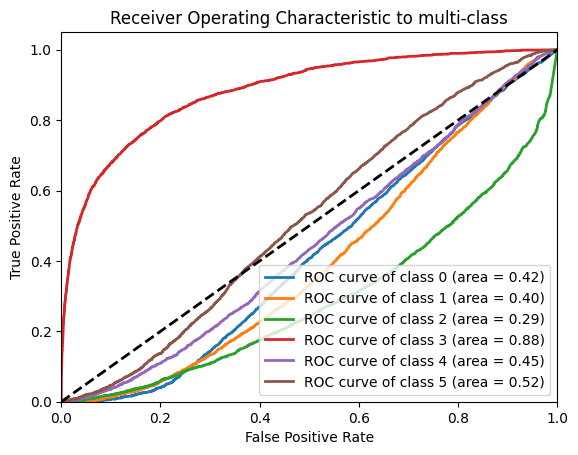

In [12]:
# Plotting ROC curve for each class
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_bin = label_binarize(y_balanced, classes=['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'])
n_classes = y_bin.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'])[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# 4. Complex Model: 

[ WORK ON PROGRESS]

Here's a summary of the EEG electrode labels and their meanings:

- Electrodes are placed on the scalp to measure brain activity using EEG.
- Each label consists of a letter(s) followed by a number.
- The letters represent specific brain regions: F (frontal), C (central), P (parietal), T (temporal), O (occipital).
- Odd numbers typically indicate electrodes on the left side of the scalp, while even numbers indicate electrodes on the right side.
- Lower numbers indicate electrodes towards the front of the head, and higher numbers indicate electrodes towards the back.
- Midline electrodes are labeled with "z" (e.g., Fz, Cz).
- Examples: Fp1 (frontopolar 1), C3 (central 3), P4 (parietal 4), T5 (temporal 5), O2 (occipital 2).
- EKG (Electrocardiogram) measures heart activity and is not part of the EEG electrode labeling system.
